In [12]:
import sys
import os
import time
import random
import json
from datetime import timezone, datetime
import string
import uuid
from uuid import UUID
import pandas as pd
import seaborn as sns

In [13]:
def random_generator(size=6, chars=string.ascii_uppercase):
    return ''.join(random.choice(chars) for x in range(size))

In [14]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
db=client.mongoengine_test
collection=db.post

documents_number = collection.count() * 200000

i=0
j=0
itr=0
MAX_ITR=10

read_readings={}

In [15]:
startf = datetime.now();
while itr<MAX_ITR: 
    start = datetime.now();
    for index in range(documents_number):
        try:
            vmid1="vm"+random_generator(2,'1234')
            #calculate the time for the insert
            
            collection.find({"vmid":vmid1})
            timec=int((datetime.now() - start).total_seconds())
            if timec==1:
                #print (timec, 'secs for',index)
                j=j+1
                read_readings[j]=index
                itr=itr+1
                break
                   
        except:
            print ('Unexpected error:', sys.exc_info()[0], ', for index ', index)
            raise
count1=collection.count()
print ("total number of docs", count1)

total number of docs 2511000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efc85483c50>], dtype=object)

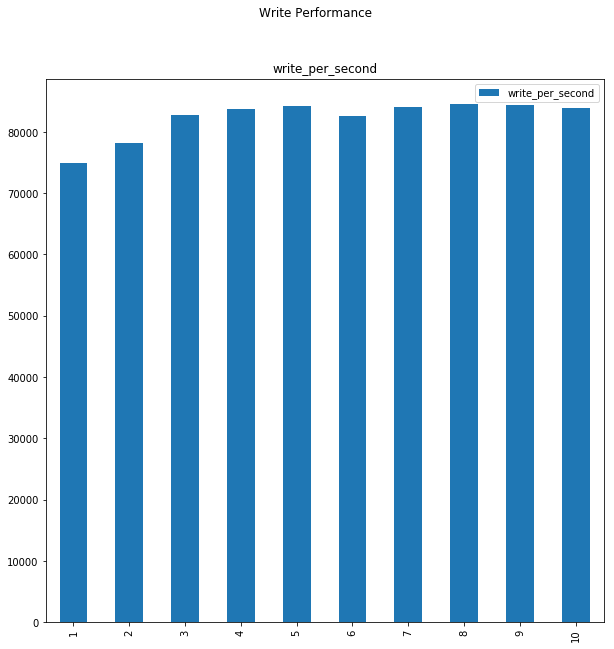

In [16]:
producer_df = pd.DataFrame.from_dict(read_readings, orient='index').rename(columns={0: 'write_per_second'})
producer_df.sort_index(inplace=True)
producer_df
producer_df.plot(kind='bar', subplots=True, figsize=(10, 10), title="Write Performance")